In [43]:
# to handle datasets
import pandas as pd
import numpy as np
from numpy import arange

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.metrics import r2_score, get_scorer
from sklearn.linear_model import Lasso, LassoCV, Ridge, ElasticNet, ElasticNetCV

# for tunning hyperparameters and optimizaation
from sklearn.model_selection import (
    StratifiedKFold, 
    GridSearchCV, 
    cross_validate, 
    train_test_split
)

# to persist the models
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# loading dataset with engineered values

X_train = pd.read_csv(r'./../dataset/2-engineered/xtrain.csv')
X_test = pd.read_csv(r'./../dataset/2-engineered/xtest.csv')

X_train.head()

,date,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,units_sold,dt_day,dt_week,dt_month,dt_quater,dt_dayofweek,dt_is_weekend
0,2021-12-14,-0.717697,0.0,-1.815603,0.908779,-0.217436,0.442574,-0.364778,1.196433,2.343690,-0.947630,0.0,-0.909762,0.0,0.0,1.443384,2.271605,0.0,1.866842,1.696944,0.0,0.0,0.0,0.630304,-0.651484,0.0,0.013231,1.763039,0.0,0.0,-0.025066,-0.724133,0.486754,0.679684,0.253183,0.0,1.008431,2.789224,1.818013,1.715681,0.438824,0.0,0.0,-0.337652,-0.851953,0.310531,1.253201,-0.871632,0.0,0.023540,0.744847,1.205501,0.234308,1.776121,1.069390,0.0,0.976763,0.0,0.0,-1.549188,1.808047,0.872915,0.0,1.700818,0.783504,0.0,-1.129059,0.0,0.0,0.182932,-0.660178,0.0,1.596724,0.0,0.859673,0.0,-2.077559,0.0,0.706936,0.0,0.0,-0.296224,0.0,-0.513870,0.853682,-0.650843,0.210386,1.038832,0.456305,0.0,0.0,0.723884,0.688200,1.533050,1.543605,2.184227,-0.655330,-0.362836,-0.030145,0.704093,24.0,-0.081988,0.642926,0.759741,0.520848,-0.999720,-0.642498
1,2021-07-12,-0.892869,0.0,0.217895,-1.313272,0.611991,0.854830,0.501965,-1.590848,-0.445301,-0.014686,0.0,-1.785094,0.0,0.0,-0.636289,0.550447,0.0,-0.605827,1.696944,0.0,0.0,0.0,-0.487351,-0.651484,0.0,0.786344,-0.680667,0.0,0.0,1.176324,1.903191,-1.553336,1.006201,1.103548,0.0,-1.121989,-0.102262,-0.621623,-0.885563,1.078489,0.0,0.0,-1.552302,-1.678440,-1.361416,0.241545,1.108448,0.0,-1.398489,0.026879,0.247413,0.099889,0.824303,-0.208733,0.0,0.007579,0.0,0.0,-0.992948,-0.629943,-1.077353,0.0,-0.688596,0.150134,0.0,-1.551405,0.0,0.0,0.133738,-0.660178,0.0,0.545001,0.0,-1.623173,0.0,-0.640319,0.0,1.041835,0.0,0.0,-0.672041,0.0,0.368476,-1.034998,-0.650843,0.293824,0.758186,1.027505,0.0,0.0,-0.269333,1.424111,-0.591470,-0.992625,0.271426,-0.655330,0.069660,-0.035583,-0.465547,28.0,1.271749,0.869793,1.015264,1.295446,0.534771,-0.642498
2,2021-08-31,1.110791,0.0,3.006462,0.657612,1.434386,0.230425,-1.144653,-1.148807,-0.445301,1.654037,0.0,1.523415,0.0,0.0,-0.636289,-0.752071,0.0,-0.605827,-0.609339,0.0,0.0,0.0,0.949956,1.205245,0.0,0.659547,0.344423,0.0,0.0,0.470946,1.549023,1.147481,1.087182,-0.813497,0.0,0.534991,-0.467673,-0.621623,-0.885563,-0.250115,0.0,0.0,1.196121,-0.525123,-1.361416,0.987794,-0.445110,0.0,0.777196,1.471187,1.322633,-0.835555,-0.797956,-0.340004,0.0,-1.494277,0.0,0.0,0.976704,-0.629943,-0.551191,0.0,0.067571,0.150134,0.0,1.327991,0.0,0.0,0.684818,1.411799,0.0,-0.692696,0.0,0.672094,0.0,1.495964,0.0,1.068766,0.0,0.0,1.700275,0.0,-2.496790,-0.721896,1.505877,-2.046639,-1.656592,-1.672283,0.0,0.0,-0.832914,0.326507,0.801542,-0.955630,-0.285811,1.676852,-1.432231,-0.563139,0.044781,25.0,0.631263,1.304994,1.264000,1.295446,-0.999720,-0.642498
3,2021-02-02,0.999889,0.0,0.607700,0.019489,0.141157,1.446439,-0.157862,-1.590848,-0.445301,-1.185169,0.0,0.645228,0.0,0.0,0.760946,1.078455,0.0,-0.605827,1.696944,0.0,0.0,0.0,-2.150821,-0.651484,0.0,0.912362,-0.680667,0.0,0.0,0.454109,0.487532,0.618273,0.513293,1.220125,0.0,-1.582141,1.095530,-0.621623,-0.460646,0.764

In [3]:
y_train = X_train['units_sold']
y_test = X_test['units_sold']

In [4]:
# loading selected features
features = pd.read_csv('./config/selected_features.csv', header=None)
features = [x for x in features[0] if x != '0']
X_train = X_train[features]
X_test = X_test[features]
X_train.head()

,feature_1,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_15,feature_16,feature_18,feature_19,feature_23,feature_24,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,feature_36,feature_37,feature_38,feature_39,feature_40,feature_43,feature_44,feature_45,feature_46,feature_47,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_56,feature_59,feature_60,feature_61,feature_63,feature_64,feature_66,feature_69,feature_70,feature_72,feature_74,feature_76,feature_78,feature_81,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,dt_day,dt_week,dt_month,dt_quater,dt_dayofweek,dt_is_weekend
0,-0.717697,-1.815603,0.908779,-0.217436,0.442574,-0.364778,1.196433,2.343690,-0.947630,1.443384,2.271605,1.866842,1.696944,0.630304,-0.651484,0.013231,1.763039,-0.025066,-0.724133,0.486754,0.679684,0.253183,1.008431,2.789224,1.818013,1.715681,0.438824,-0.337652,-0.851953,0.310531,1.253201,-0.871632,0.023540,0.744847,1.205501,0.234308,1.776121,1.069390,0.976763,-1.549188,1.808047,0.872915,1.700818,0.783504,-1.129059,0.182932,-0.660178,1.596724,0.859673,-2.077559,0.706936,-0.296224,-0.513870,0.853682,-0.650843,0.210386,1.038832,0.456305,0.723884,0.688200,1.533050,1.543605,2.184227,-0.655330,-0.362836,-0.030145,0.704093,-0.081988,0.642926,0.759741,0.520848,-0.999720,-0.642498
1,-0.892869,0.217895,-1.313272,0.611991,0.854830,0.501965,-1.590848,-0.445301,-0.014686,-0.636289,0.550447,-0.605827,1.696944,-0.487351,-0.651484,0.786344,-0.680667,1.176324,1.903191,-1.553336,1.006201,1.103548,-1.121989,-0.102262,-0.621623,-0.885563,1.078489,-1.552302,-1.678440,-1.361416,0.241545,1.108448,-1.398489,0.026879,0.247413,0.099889,0.824303,-0.208733,0.007579,-0.992948,-0.629943,-1.077353,-0.688596,0.150134,-1.551405,0.133738,-0.660178,0.545001,-1.623173,-0.640319,1.041835,-0.672041,0.368476,-1.034998,-0.650843,0.293824,0.758186,1.027505,-0.269333,1.424111,-0.591470,-0.992625,0.271426,-0.655330,0.069660,-0.035583,-0.465547,1.271749,0.869793,1.015264,1.295446,0.534771,-0.642498
2,1.110791,3.006462,0.657612,1.434386,0.230425,-1.144653,-1.148807,-0.445301,1.654037,-0.636289,-0.752071,-0.605827,-0.609339,0.949956,1.205245,0.659547,0.344423,0.470946,1.549023,1.147481,1.087182,-0.813497,0.534991,-0.467673,-0.621623,-0.885563,-0.250115,1.196121,-0.525123,-1.361416,0.987794,-0.445110,0.777196,1.471187,1.322633,-0.835555,-0.797956,-0.340004,-1.494277,0.976704,-0.629943,-0.551191,0.067571,0.150134,1.327991,0.684818,1.411799,-0.692696,0.672094,1.495964,1.068766,1.700275,-2.496790,-0.721896,1.505877,-2.046639,-1.656592,-1.672283,-0.832914,0.326507,0.801542,-0.955630,-0.285811,1.676852,-1.432231,-0.563139,0.044781,0.631263,1.304994,1.264000,1.295446,-0.999720,-0.642498
3,0.999889,0.607700,0.019489,0.141157,1.446439,-0.157862,-1.590848,-0.445301,-1.185169,0.760946,1.078455,-0.605827,1.696944,-2.150821,-0.651484,0.912362,-0.680667,0.454109,0.487532,0.618273,0.513293,1.220125,-1.582141,1.095530,-0.621623,-0.460646,0.764016,0.087059,0.309261,2.048118,0.968380,0.527473,-0.105068,0.071168,-0.075730,-0.302214,0.349996,1.378518,0.875043,0.710101,-0.629943,1.554484,1.436719,0.783504,0.242340,1.389775,1.734288,1.658595,0.301461,-0.002756,0.543794,0.878241,-1.312861,-0.012536,1.721055,0.543265,-1.474569,0.801587,-1.177167,-1.646155,1.147644,-0.774058,0.448868,-0.655330,0.210772,-0.287637,-1.534046,-0.305287,0.227480,-0.354877,-0.354452,-0.999720,-0.642498
4,0.886720,0.800874,1.253868,0.886868,-0.902563,-0.316844,-0.153146,-0.445301,0.489308,0.816554,1.432886,-0.605827,-0.609339,-1.540845,1.753458,0.274301,-0.680667,2.039246,-0.947509,1.040292,0.433455,-0.220934,0.830965,-0.548621,-0.621623,-0.885563,1.679889,1.298765,-0.768974,-1.361416,-0.644269,-0.163830,-0.135010,0.523113,-1.516433,1.316195,-0.173784,-0.455651,0.566225,0.581204,-0.629943,-1.076231,-0.688596,-1.707678,1.187692,0.811600,-0.660

#### Lasso Model implementation

In [30]:
# ElasticNet Regression
lasso = Lasso(alpha=0.005, random_state=0)

# hyperparameter space
param_grid = dict(
    alpha=[1e-4, 0.005, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
)

# Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# search
clf = GridSearchCV(
    lasso,
    param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=skf,
    refit=True,
    return_train_score=True,
    verbose=1
)

lasso_gscv = clf.fit(X_train, y_train)

# best hyperparameters
lasso_gscv.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\jaspe\anaconda3\envs\sales_predicition\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'alpha': 1.0}

#### Ridge Model implementation

In [31]:
# ElasticNet Regression
rm = Ridge()

# hyperparameter space
param_grid = dict(
    alpha=[1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
    solver=['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
)

# Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# search
clf = GridSearchCV(
    rm,
    param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=skf,
    refit=True,
    return_train_score=True,
    verbose=1
)

rm_gscv = clf.fit(X_train, y_train)

# best hyperparameters
rm_gscv.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\jaspe\anaconda3\envs\sales_predicition\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'alpha': 100.0, 'solver': 'sag'}

#### ElasticNet Model implementation

In [32]:
# ElasticNet Regression
enm = ElasticNet()

# hyperparameter space
param_grid = dict(
    alpha=[1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
    l1_ratio=arange(0, 1, 0.01),  
)

# Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# search
clf = GridSearchCV(
    enm,
    param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=skf,
    refit=True,
    return_train_score=True,
    verbose=1
)

en_gscv = clf.fit(X_train, y_train)

# best hyperparameters
en_gscv.best_params_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


C:\Users\jaspe\anaconda3\envs\sales_predicition\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'alpha': 1.0, 'l1_ratio': 0.99}

In [36]:
model_results = dict(
    Lasso = lasso_gscv,
    Rigde = rm_gscv,
    Elasticnet = en_gscv
)


 LASSO RESULTS
MAE: -6.04040
Config: {'alpha': 1.0}
train mse: 5.73478906153498e+46
train rmse: 2.39474196136765e+23
test r2: 0.5817374071923923
test mse: 1.561961845752927e+49
test rmse: 3.9521662993261393e+24
test r2: 0.4673456039990276
Average Units Sold:  13.893805309734514
Average Units Sold -prediction:  14.916579783889526

 RIGDE RESULTS
MAE: -6.22265
Config: {'alpha': 100.0, 'solver': 'sag'}
train mse: 5.734789061524927e+46
train rmse: 2.3947419613655512e+23
test r2: 0.6479888589058624
test mse: 1.5619618457529146e+49
test rmse: 3.952166299326123e+24
test r2: 0.5245570177202877
Average Units Sold:  13.893805309734514
Average Units Sold -prediction:  14.856632040051359

 ELASTICNET RESULTS
MAE: -6.04996
Config: {'alpha': 1.0, 'l1_ratio': 0.99}
train mse: 5.734789061535026e+46
train rmse: 2.3947419613676598e+23
test r2: 0.5815833818928489
test mse: 1.561961845752927e+49
test rmse: 3.9521662993261393e+24
test r2: 0.4675669733978346
Average Units Sold:  13.893805309734514
Average 

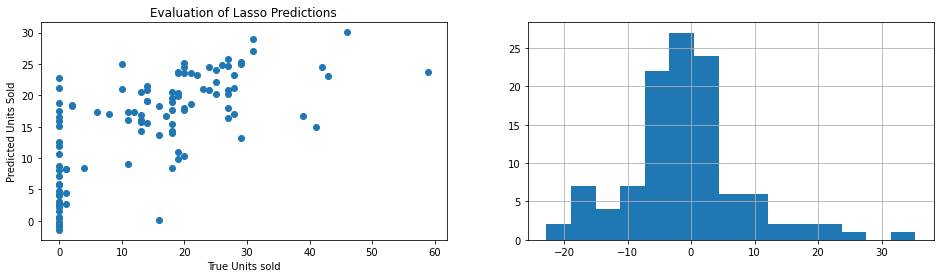

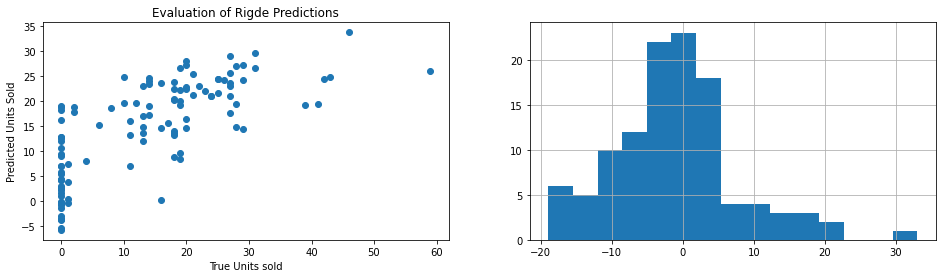

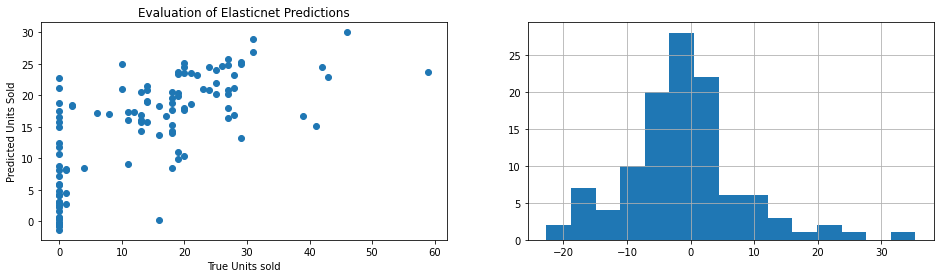

In [51]:
# Visualizing results
scorer = get_scorer('r2')

for model, results in model_results.items():
    print(f'\n {model.upper()} RESULTS')
    print('MAE: %.5f' % results.best_score_)
    print('Config: %s' % results.best_params_)
    pred = results.predict(X_train)
    print('train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
    print('train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
    print('test r2: {}'.format(scorer(results, X_train, y_train)))
    pred = results.predict(X_test)
    print('test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
    print('test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
    print('test r2: {}'.format(scorer(results, X_test, y_test)))
    print('Average Units Sold: ', y_test.mean())
    print('Average Units Sold -prediction: ', pred.mean())
    
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, results.predict(X_test))
    plt.xlabel('True Units sold')
    plt.ylabel('Predicted Units Sold')
    plt.title(f'Evaluation of {model} Predictions')

    # let's evaluate the distribution of the errors: 
    # they should be fairly normally distributed

    # histogram of error predictions test
    plt.subplot(1, 2, 2)
    errors = y_test - results.predict(X_test)
    errors.hist(bins=15)
    
    file_path = f'./../model/{model}_model.sav'
    joblib.dump(results, file_path)

From the above result Lasso is observed to be the best performing model by a slight margin, and will be used in the final ML pipeline.

While in the analysis of the error spread we should look out for a guassian distribution like the distribution above it is important to note the error spread which is quite concerning.

#### Feature Importance

Text(0.5, 1.0, 'Feature Importance')

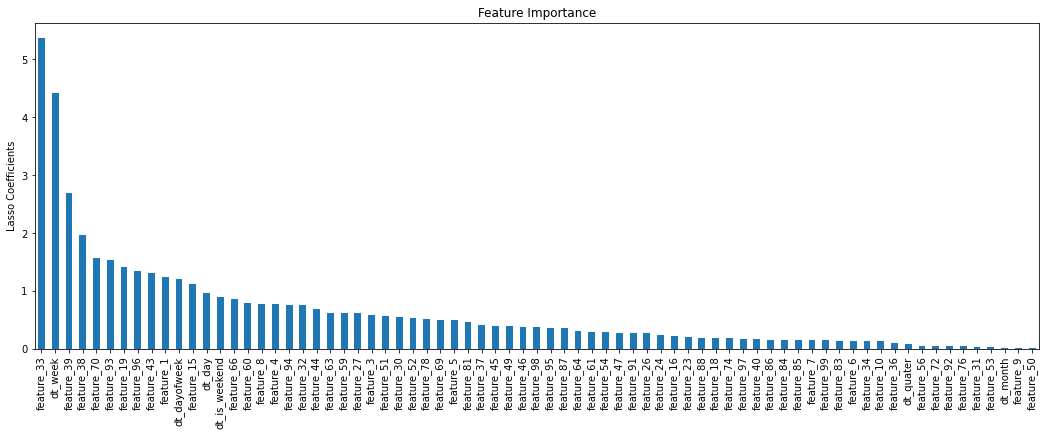

In [19]:
# from the lasso reg used in feature selection
lin_model = Lasso(alpha=0.005, random_state=0) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')